In [3]:
import matplotlib.pyplot as plt
import pickle
import datetime as dt
import numpy as np
import pandas as pd

/Users/Sam/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [10]:
from sklearn.linear_model import LinearRegression

In [5]:
#load the data
tsla = pickle.load(open("data_h.pickle","rb"))
print(tsla.head())
print("\n Dataframe size = ",tsla.shape)
print("\n first index = ",tsla.index[0], "; last index = ", tsla.index[-1], "; second index = ",tsla.index[1])
tsla = tsla.drop(['High','Low','Close','Volume','Dividends','Stock Splits'],axis=1) #just gonna look at Open prices for now

                 Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2019-02-11  62.349998  63.700001  62.135998  63.167999  3140581          0   
2019-02-11  63.153004  63.338001  62.640003  62.902000   876534          0   
2019-02-11  62.935997  63.296001  62.730000  63.250000   801005          0   
2019-02-11  63.230000  63.412640  62.937798  62.956001   563722          0   
2019-02-11  62.996002  63.035999  62.690002  62.840981   513318          0   

            Stock Splits  
Date                      
2019-02-11           0.0  
2019-02-11           0.0  
2019-02-11           0.0  
2019-02-11           0.0  
2019-02-11           0.0  

 Dataframe size =  (3518, 7)

 first index =  2019-02-11 00:00:00 ; last index =  2021-02-10 00:00:00 ; second index =  2019-02-11 00:00:00


In [6]:
tsla.columns=['t']

In [25]:
tsla['t-1'] = tsla['t'].shift(1)
tsla['t-2'] = tsla['t'].shift(2)
tsla['t-3'] = tsla['t'].shift(3)
tsla['t-4'] = tsla['t'].shift(4)
tsla['t-5'] = tsla['t'].shift(5)
tsla['t-6'] = tsla['t'].shift(6)
tsla['t-7'] = tsla['t'].shift(7)
tsla['t+1'] = tsla['t'].shift(-1)
tsla['t+2'] = tsla['t'].shift(-2)
tsla['t+3'] = tsla['t'].shift(-3)
tsla['t+4'] = tsla['t'].shift(-4)
tsla['t+5'] = tsla['t'].shift(-5)
tsla['t+6'] = tsla['t'].shift(-6)

In [24]:
tsla.head()

,t,t-1,t-2,t-3,t-4,t-5,t+1,t+2,t+3,t+4
Date,,,,,,,,,,
2019-02-11,62.349998,NaN,NaN,NaN,NaN,NaN,63.153004,62.935997,63.230000,62.996002
2019-02-11,63.153004,62.349998,NaN,NaN,NaN,NaN,62.935997,63.230000,62.996002,62.826836
2019-02-11,62.935997,63.153004,62.349998,NaN,NaN,NaN,63.230000,62.996002,62.826836,62.770000
2019-02-11,63.230000,62.935997,63.153004,62.349998,NaN,NaN,62.996002,62.826836,62.770000,63.230000
2019-02-11,62.996002,63.230000,62.935997,63.153004,62.349998,NaN,62.826836,62.770000,63.230000,62.967999


In [26]:
y = tsla.dropna()[['t','t+1','t+2','t+3','t+4','t+5','t+6']].to_numpy() #.reshape(-1,1)
x = tsla.dropna()[['t-1','t-2','t-3','t-4','t-5','t-6','t-7']].to_numpy() #.reshape(-1,1)
model = LinearRegression().fit(x, y)
print('intercept : ', model.intercept_ , 'coefs : ', model.coef_)

intercept :  [0.04330794 0.08155807 0.13251663 0.18690737 0.24001804 0.29529486
 0.35567669] coefs :  [[ 9.50529727e-01  5.15666790e-02  3.71350495e-02 -5.32292097e-02
   1.03871684e-02  1.05325454e-01 -1.00944427e-01]
 [ 9.54609314e-01  8.59163291e-02 -1.50633480e-02 -4.22470240e-02
   1.12488822e-01 -4.99218825e-02 -4.42114030e-02]
 [ 9.93287493e-01  3.44376347e-02 -4.54696510e-03  6.16169970e-02
  -4.41941321e-02 -4.48464871e-03 -3.38289439e-02]
 [ 9.78557097e-01  4.69972239e-02  1.01297011e-01 -9.71988648e-02
   7.09729341e-04 -3.87260013e-03 -2.34572509e-02]
 [ 9.76992997e-01  1.52016414e-01 -5.73470325e-02 -5.20423830e-02
   5.25900555e-04 -7.01075888e-03 -9.35175766e-03]
 [ 1.08055834e+00 -6.64283221e-03 -1.20863331e-02 -5.19925375e-02
  -3.12508566e-03  3.74622102e-04 -2.56233400e-03]
 [ 1.02036833e+00  4.39880701e-02 -8.23396593e-03 -6.10380502e-02
   5.25665611e-03  1.75315476e-02 -1.25334091e-02]]


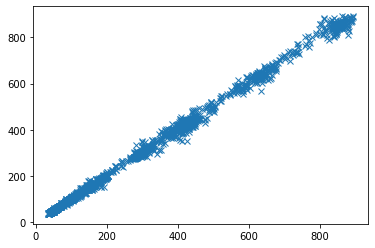

In [22]:
plt.plot(tsla['t-4'],tsla['t'],'x')

In [67]:
x_new = tsla[['t-7','t-6','t-5','t-4','t-3','t-2','t-1']].iloc[-1].to_numpy()

In [68]:
#print(tsla.iloc[-7:-1])
print(x_new)

[844.32000732 844.60998535 843.         817.91998291 813.63000488
 813.90002441 810.20001221]


In [69]:
y_new=model.predict(x_new.reshape(1,-1))

In [70]:
print(y_new[0])

[846.30644394 846.46278353 847.42013338 850.40953657 849.76431766
 849.99343909 850.55169301]


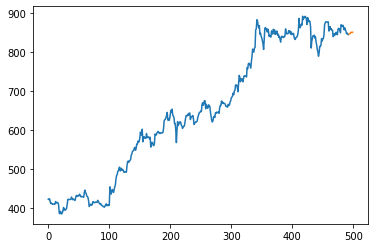

In [72]:
start = -500
end = -7
length = -start+end
plt.plot(range(length),tsla['t'].iloc[start:end].to_numpy())
plt.plot(range(length,length+7),y_new[0])
plt.show()

In [86]:
#tsla = tsla['t']
tsla.columns=['t']
tsla.head()

,t
Date,
2019-02-11,62.349998
2019-02-11,63.153004
2019-02-11,62.935997
2019-02-11,63.230000
2019-02-11,62.996002


In [87]:
tsla['t']

Date
2019-02-11     62.349998
2019-02-11     63.153004
2019-02-11     62.935997
2019-02-11     63.230000
2019-02-11     62.996002
                 ...    
2021-02-10    817.919983
2021-02-10    813.630005
2021-02-10    813.900024
2021-02-10    810.200012
2021-02-10    809.669983
Name: t, Length: 3518, dtype: float64

In [7]:
for i in range(1,36):
    name = 't-'+str(i)
    print(name)
    tsla[name] = tsla['t'].shift(i)
for i in range(1,35):
    name = 't+'+str(i)
    print(name)
    tsla[name] = tsla['t'].shift(-i)

t-1
t-2
t-3
t-4
t-5
t-6
t-7
t-8
t-9
t-10
t-11
t-12
t-13
t-14
t-15
t-16
t-17
t-18
t-19
t-20
t-21
t-22
t-23
t-24
t-25
t-26
t-27
t-28
t-29
t-30
t-31
t-32
t-33
t-34
t-35
t+1
t+2
t+3
t+4
t+5
t+6
t+7
t+8
t+9
t+10
t+11
t+12
t+13
t+14
t+15
t+16
t+17
t+18
t+19
t+20
t+21
t+22
t+23
t+24
t+25
t+26
t+27
t+28
t+29
t+30
t+31
t+32
t+33
t+34


In [12]:
import statsmodels.api as sm

In [8]:
y_cols = ['t']+['t+'+str(i) for i in range(1,35)]
print('y_cols = ',y_cols)
x_cols = ['t-'+str(i) for i in range(1,36)]
x_cols.reverse()
print('x_cols = ',x_cols)
y = tsla.dropna()[y_cols].to_numpy() #.reshape(-1,1)
x = tsla.dropna()[x_cols].to_numpy() #.reshape(-1,1)
model = LinearRegression().fit(x, y)
print(model.summary())
#print('intercept : ', model.intercept_ , 'coefs : ', model.coef_)

y_cols =  ['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8', 't+9', 't+10', 't+11', 't+12', 't+13', 't+14', 't+15', 't+16', 't+17', 't+18', 't+19', 't+20', 't+21', 't+22', 't+23', 't+24', 't+25', 't+26', 't+27', 't+28', 't+29', 't+30', 't+31', 't+32', 't+33', 't+34']
x_cols =  ['t-35', 't-34', 't-33', 't-32', 't-31', 't-30', 't-29', 't-28', 't-27', 't-26', 't-25', 't-24', 't-23', 't-22', 't-21', 't-20', 't-19', 't-18', 't-17', 't-16', 't-15', 't-14', 't-13', 't-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']


AttributeError: 'LinearRegression' object has no attribute 'summary'

In [14]:
y_cols = ['t']+['t+'+str(i) for i in range(1,35)]
print('y_cols = ',y_cols)
x_cols = ['t-'+str(i) for i in range(1,36)]
x_cols.reverse()
print('x_cols = ',x_cols)
y = tsla.dropna()[y_cols].to_numpy() #.reshape(-1,1)
x = tsla.dropna()[x_cols].to_numpy() #.reshape(-1,1)
x = sm.add_constant(x)
sm_model = sm.OLS(x,y)
res = sm_model.fit()
print(res.summary())
#print('intercept : ', model.intercept_ , 'coefs : ', model.coef_)

y_cols =  ['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7', 't+8', 't+9', 't+10', 't+11', 't+12', 't+13', 't+14', 't+15', 't+16', 't+17', 't+18', 't+19', 't+20', 't+21', 't+22', 't+23', 't+24', 't+25', 't+26', 't+27', 't+28', 't+29', 't+30', 't+31', 't+32', 't+33', 't+34']
x_cols =  ['t-35', 't-34', 't-33', 't-32', 't-31', 't-30', 't-29', 't-28', 't-27', 't-26', 't-25', 't-24', 't-23', 't-22', 't-21', 't-20', 't-19', 't-18', 't-17', 't-16', 't-15', 't-14', 't-13', 't-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3', 't-2', 't-1']


ValueError: shapes (3449,36) and (3449,36) not aligned: 36 (dim 1) != 3449 (dim 0)

In [95]:
x_new = tsla[x_cols].iloc[-1].to_numpy()
y_new=model.predict(x_new.reshape(1,-1))

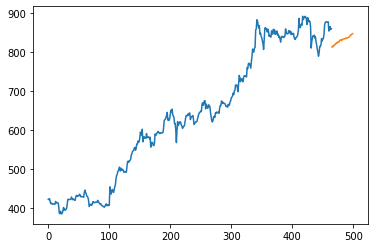

855.469970703125


In [99]:
start = -500
end = -35
length = -start+end
plt.plot(range(length),tsla['t'].iloc[start:end].to_numpy())
plt.plot(range(length,length+35),y_new[0])
plt.show()
print(tsla['t'].iloc[end])

# Loading the data and correcting the time

Note to self: I should do this time correction once and then save the corrected data somewhere

In [4]:
tsla = pickle.load(open("../data/data_h.pickle","rb"))

def add_hour(x):
    x = x.to_pydatetime() + dt.timedelta(hours=1)
    return pd.Timestamp(x)

tsla = tsla.reset_index()
while tsla.duplicated(subset='Date').any() == True:
    tsla_duplicated = tsla.duplicated(subset='Date')
    tsla.loc[tsla_duplicated,'Date'] = tsla[tsla_duplicated]['Date'].apply(add_hour)   
for i in range(10):
    tsla.loc[:,'Date'] = tsla[:]['Date'].apply(add_hour)    
#tsla.set_index('Date',inplace=True)
print(tsla.head())

                 Date       Open       High        Low      Close   Volume  \
0 2019-02-11 10:00:00  62.349998  63.700001  62.135998  63.167999  3140581   
1 2019-02-11 11:00:00  63.153004  63.338001  62.640003  62.902000   876534   
2 2019-02-11 12:00:00  62.935997  63.296001  62.730000  63.250000   801005   
3 2019-02-11 13:00:00  63.230000  63.412640  62.937798  62.956001   563722   
4 2019-02-11 14:00:00  62.996002  63.035999  62.690002  62.840981   513318   

   Dividends  Stock Splits  
0          0           0.0  
1          0           0.0  
2          0           0.0  
3          0           0.0  
4          0           0.0  


# Cut date for training/test set

In [5]:
cut_date = dt.datetime(year=2021,month=1,day=4,hour=10) # For now just testing various cut point around 2 month
print('cut date = ',cut_date)
print(pd.Timestamp(cut_date))
cut_idx = tsla.index[tsla['Date'] == pd.Timestamp(cut_date)].values[0]
print('cut index = ',cut_idx)

cut date =  2021-01-04 10:00:00
2021-01-04 10:00:00
cut index =  3330


# First linear regression atempt
building the features matrix and response vector

In [50]:
response = tsla['Open']
t = tsla.index
variables = {
    't':t,
    't^2':t**2,
    't^3':t**3,
    'e^t':np.exp(1/1000*t)
}
features = pd.DataFrame(variables) #the 1/1000 cst is kinda random... (it's just to get an exponential term)
features = sm.add_constant(features)

There definitly seems to be some exponential thing going on, so i'll include one. I had to add the 1/1000 constant, in order to not have memory overflow errors. I could have also used a different one, so I don't know 

In [51]:
y_train = response[:cut_idx]
x_train = features[:cut_idx]
sm_model = sm.OLS(y_train,x_train)
res = sm_model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 2.392e+04
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:58:01   Log-Likelihood:                -16158.
No. Observations:                3330   AIC:                         3.233e+04
Df Residuals:                    3325   BIC:                         3.236e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8279      3.142     13.950      0.0

In this first attempt, there the polynomial terms above 1 don't seem to have much effect.

# prediction

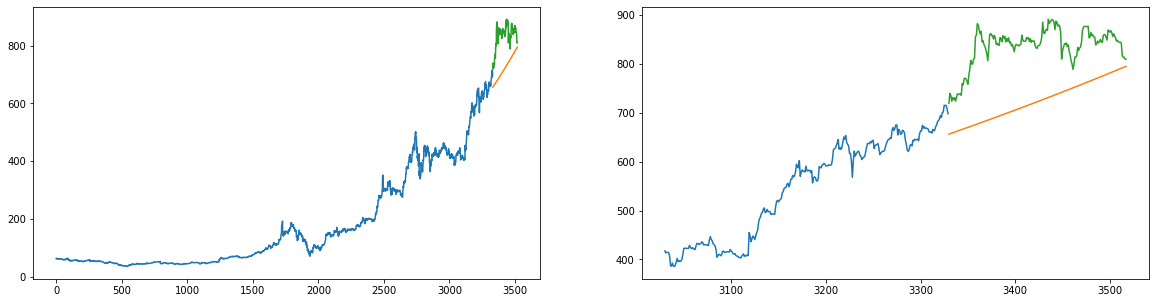

In [54]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:]
x_test = features[cut_idx:]
y_test = res.predict(x_test)

axs[0].plot(x_train['t'],y_train)
axs[0].plot(x_test['t'],y_test)
axs[0].plot(x_test['t'],y_test_true)

axs[1].plot(x_train['t'][-300:],y_train[-300:])
axs[1].plot(x_test['t'],y_test)
axs[1].plot(x_test['t'],y_test_true)

The prediction isn't great, but that was expected. Let's try some other classic and basic methods, still just using time as a univariate

In [11]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.neighbors import RadiusNeighborsRegressor as radNN
from sklearn.linear_model import RidgeCV as Ridge
from sklearn.linear_model import LinearRegression

# KNN

In [22]:
knn = KNN()
knn.fit(x_train,y_train)

KNeighborsRegressor()

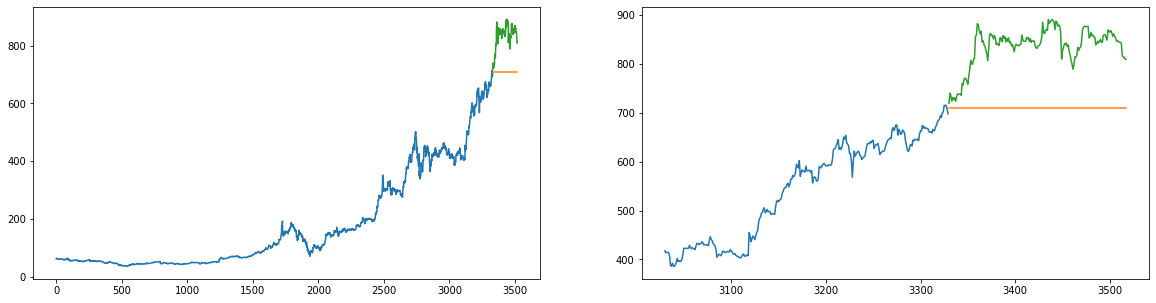

In [23]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:]
x_test = features[cut_idx:]
y_test = knn.predict(x_test)

axs[0].plot(x_train['t'],y_train)
axs[0].plot(x_test['t'],y_test)
axs[0].plot(x_test['t'],y_test_true)

axs[1].plot(x_train['t'][-300:],y_train[-300:])
axs[1].plot(x_test['t'],y_test)
axs[1].plot(x_test['t'],y_test_true)

I actually wasn't expecting this, but now that I see it, it actually makes perfect sens: KNN choses the K closes points IN THE TRAINING SET, and since there is no training data in the zone of the test set,it takes always takes the K last observations in the training set, as they are always the K closest. And so the average of those K is always the same value.

I think this will actually end up being a common problem with all the univariate attempts like this: There is no data close to the points we are trying to predict, so all predictions will be bad.

If we try a few more anyways:

# KNN with radius

In [44]:
radnn = radNN(radius=200.0)
radnn.fit(x_train,y_train)

RadiusNeighborsRegressor(radius=200.0)

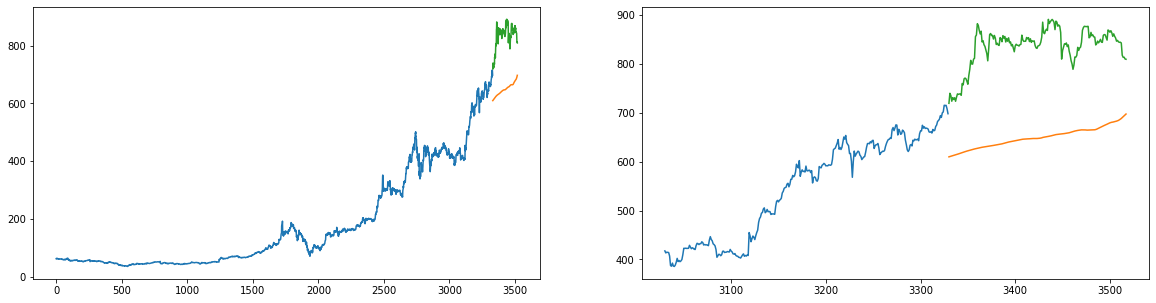

In [45]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:]
x_test = features[cut_idx:]
y_test = radnn.predict(x_test)

axs[0].plot(x_train['t'],y_train)
axs[0].plot(x_test['t'],y_test)
axs[0].plot(x_test['t'],y_test_true)

axs[1].plot(x_train['t'][-300:],y_train[-300:])
axs[1].plot(x_test['t'],y_test)
axs[1].plot(x_test['t'],y_test_true)

Also bad, for the same reasons, but with a different result. In the radius verion of KNN, it averages all the neighbors, in the training set, that are within a certain radius of the new point. First of all, I had to set a radius of 200 (which is about the distance from the last point of the training set with the last point of the test set), or a lot of points won't even have any neighbors. This time, instead of having a horizontal line, we get a smoothed version of the last 200 observations of the training set.
With this technique there the predictions will never go above the highest value or below the lowest value, of the last "K" observations from the training set. So it's clearly very bad.

# Ridge

In [155]:
response = tsla['Open']
t = tsla.index
variables = {
    't':t,
#    't^2':t**2,
#    't^3':t**3,
    'e^t':np.exp(1/1000*t)
}
features = pd.DataFrame(variables) #the 1/1000 cst is kinda random... (it's just to get an exponential term)
features = sm.add_constant(features)

y_train = response[:cut_idx]
x_train = features[:cut_idx]

ridge = Ridge()
ridge.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

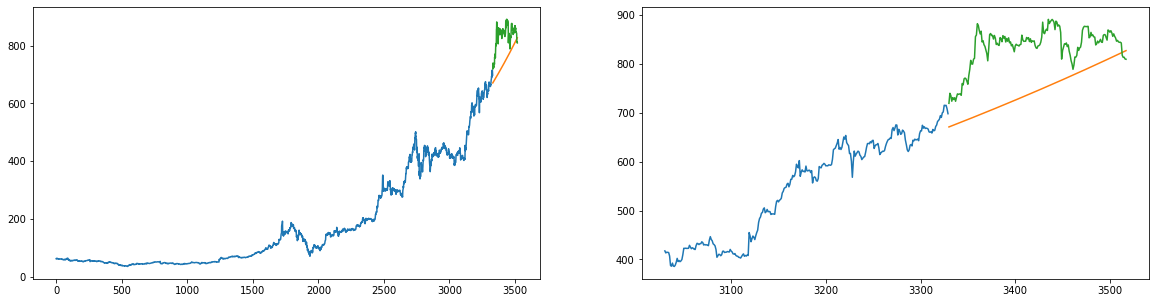

In [156]:
fig, axs =plt.subplots(1,2,figsize=(20,5))


y_test_true = response[cut_idx:]
x_test = features[cut_idx:]
y_test = ridge.predict(x_test)

axs[0].plot(x_train['t'],y_train)
axs[0].plot(x_test['t'],y_test)
axs[0].plot(x_test['t'],y_test_true)

axs[1].plot(x_train['t'][-300:],y_train[-300:])
axs[1].plot(x_test['t'],y_test)
axs[1].plot(x_test['t'],y_test_true)

Same thing as with the linear case.

What we really need to is make the prediction area less sparse (or at least not empty haha). Here is what I am thinking:
We setup a scheme, where we use the last m observations, to predict the next n observations, then train it on the training set and test on the test set. Hopefully this will get ride of the problem of using time as the variable, as now we are using previous prices as variable, and the prices aren't linearly spaced

# Using previous observations as features

X = (O_t-1 , ... , O_t-140) => feature space of dimension ~140  
Y = (O_t , ... , O_t+140) => Response space of dimension ~140

training set size = ~3000  
test set size = 1 (48) which is about 1 month of data

In [6]:
response = pd.DataFrame({'O@t':tsla['Open']})
#response.columns(['O@t'])
features = pd.DataFrame()
for i in range(1,35*4):
    response['O@t+'+str(i)] = response['O@t'].shift(-i)
    features['O@t-'+str(i)] = response['O@t'].shift(i)
    
print('Response matrix : ',response.head())
print('Feature matrix : ',features.head())

Response matrix :           O@t      O@t+1      O@t+2      O@t+3      O@t+4      O@t+5  \
0  62.349998  63.153004  62.935997  63.230000  62.996002  62.826836   
1  63.153004  62.935997  63.230000  62.996002  62.826836  62.770000   
2  62.935997  63.230000  62.996002  62.826836  62.770000  63.230000   
3  63.230000  62.996002  62.826836  62.770000  63.230000  62.967999   
4  62.996002  62.826836  62.770000  63.230000  62.967999  63.323997   

       O@t+6      O@t+7      O@t+8      O@t+9  ...    O@t+130    O@t+131  \
0  62.770000  63.230000  62.967999  63.323997  ...  55.984001  56.253998   
1  63.230000  62.967999  63.323997  62.944317  ...  56.253998  56.447998   
2  62.967999  63.323997  62.944317  62.292000  ...  56.447998  56.722584   
3  63.323997  62.944317  62.292000  62.583000  ...  56.722584  57.318001   
4  62.944317  62.292000  62.583000  62.579998  ...  57.318001  57.302002   

     O@t+132    O@t+133    O@t+134    O@t+135    O@t+136    O@t+137  \
0  56.447998  56.722584  5

## Linear regression V2
Let's do standard linear regresison on this, and then we can compare it to the linear regession we did with time a the variable, instead of previous prices as variables

In [164]:
y_train = response[35*4:cut_idx] #gotta remove the line with NaN's
x_train = features[35*4:cut_idx]
#print('x_train : ',x_train)
#print('y_train : ',y_train)
lm = LinearRegression().fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])

y_test :  (48, 140)
x_test.index :  (48,)
y_test_true :  (48, 140)


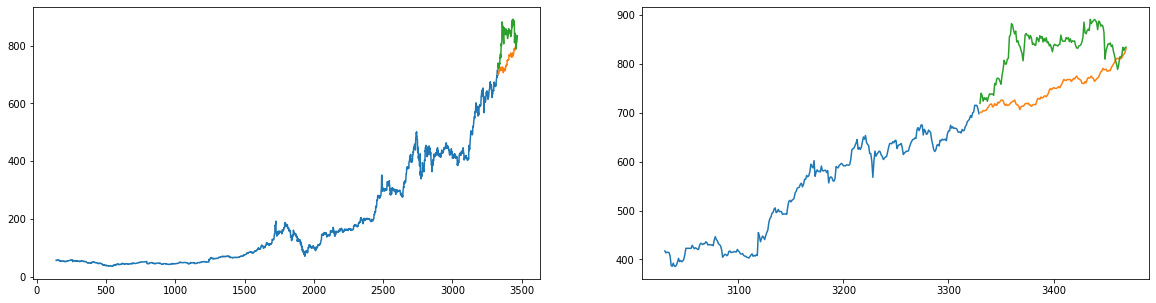

In [142]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:-35*4]
x_test = features[cut_idx:-35*4]
y_test = lm.predict(x_test)
print('y_test : ',np.shape(y_test))
print('x_test.index : ',np.shape(x_test.index))
print('y_test_true : ',np.shape(y_test_true))

axs[0].plot(y_train['O@t'])
#axs[0].plot(x_test.index,y_test[:,0])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test[0,:])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true.iloc[0])

axs[1].plot(y_train['O@t'][-300:])
#axs[1].plot(x_test.index,y_test[:,0])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test[0,:])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true.iloc[0])

This does look more interesting. Let's try KNN now

## KNN V2

In [143]:
knn_v2 = KNN().fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])

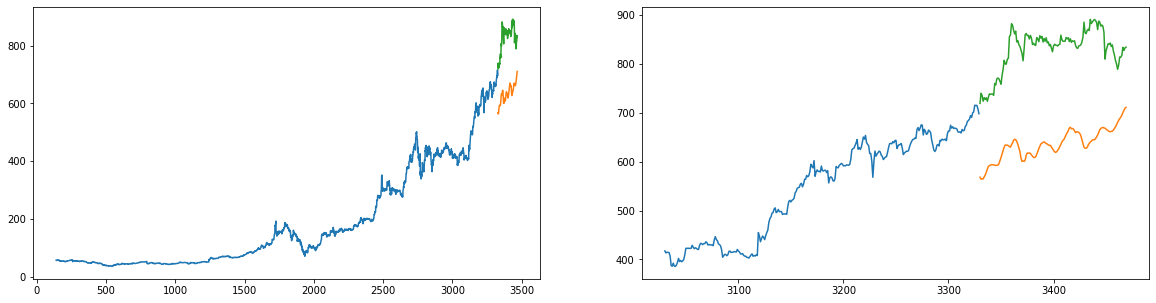

In [144]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:-35*4]
x_test = features[cut_idx:-35*4]
y_test = knn_v2.predict(x_test)

axs[0].plot(y_train['O@t'])
#axs[0].plot(x_test.index,y_test[:,0])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test[0,:])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true.iloc[0])

axs[1].plot(y_train['O@t'][-300:])
#axs[1].plot(x_test.index,y_test[:,0])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test[0,:])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true.iloc[0])

Okay, nevermind, the sparsity problem is still here, we just changed it. What I didn't take into account, is that the stock price range we are trying to predict, is larger than anything in the training set...

In [157]:
from sklearn.ensemble import ExtraTreesRegressor

In [165]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])

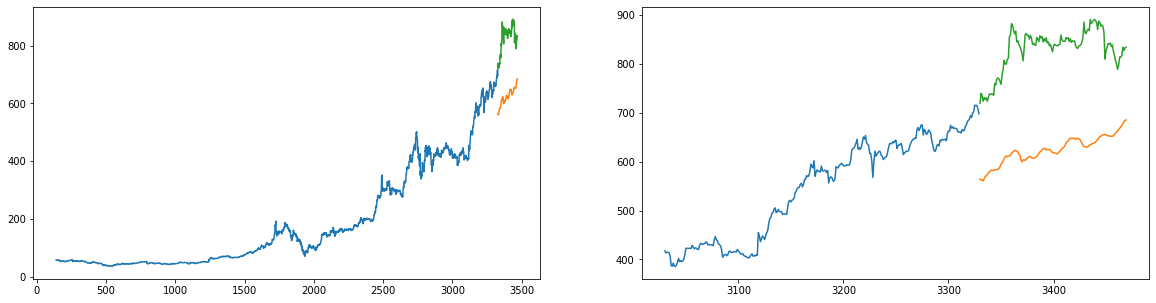

In [166]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:-35*4]
x_test = features[cut_idx:-35*4]
y_test = reg.predict(x_test)

axs[0].plot(y_train['O@t'])
#axs[0].plot(x_test.index,y_test[:,0])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test[0,:])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true.iloc[0])

axs[1].plot(y_train['O@t'][-300:])
#axs[1].plot(x_test.index,y_test[:,0])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test[0,:])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true.iloc[0])

What we really need to do, is change the problem, from directly trying to model and predict the stock price, and go to something more like the Time Series version, where we predict variation, that way we don't have the sparsity problem. That and we should definitly use more variable. That is what we shall do next.

So of the variables to consider:
-google trends data (theory: before big price swings, up or down, there is an increase of google searches for tesla)
-musk tweets (theory: Musk's tweets influence the price, up or down)
-USD inflation (could a non-neglectable part of the price increase just be due to inflation ?)
-competitors stock prices (theory: how well the competition is doing will influence how well tesla is doing)
-...

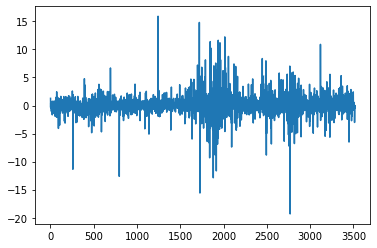

In [7]:
returns = 100*(np.log(tsla['Open'])).diff()
plt.plot(returns)
#inv_returns = np.exp((returns/100).cumsum()+np.log(tsla['Open'].iloc[0]))
#plt.figure(2)
#plt.plot(inv_returns)

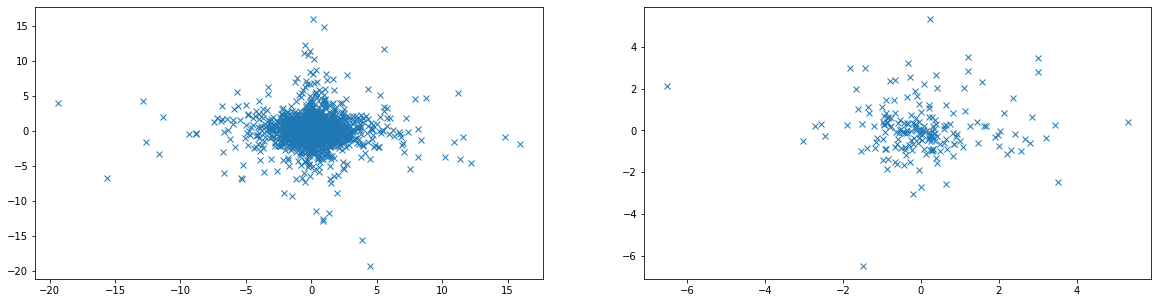

In [19]:
fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].plot(returns.shift(1)[:3330],returns[:3330],'x')
axs[1].plot(returns.shift(1)[3330:],returns[3330:],'x')

In [8]:
response = pd.DataFrame({'O@t':returns})
#response.columns(['O@t'])
features = pd.DataFrame()
for i in range(1,35*4):
    response['O@t+'+str(i)] = response['O@t'].shift(-i)
    features['O@t-'+str(i)] = response['O@t'].shift(i)
    
#print('Response matrix : ',response.head())
#print('Feature matrix : ',features.head())

In [12]:
y_train = response[35*4:cut_idx] #gotta remove the line with NaN's
x_train = features[35*4:cut_idx]
#print('x_train : ',x_train)
#print('y_train : ',y_train)
lm = LinearRegression().fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])

y_test :  (48, 140)
x_test.index :  (48,)
y_test_true :  (48, 140)
698.203186035156
y_test_os :  (48, 140)
x_test.index :  (48,)
y_test_true_os :  (48, 140)


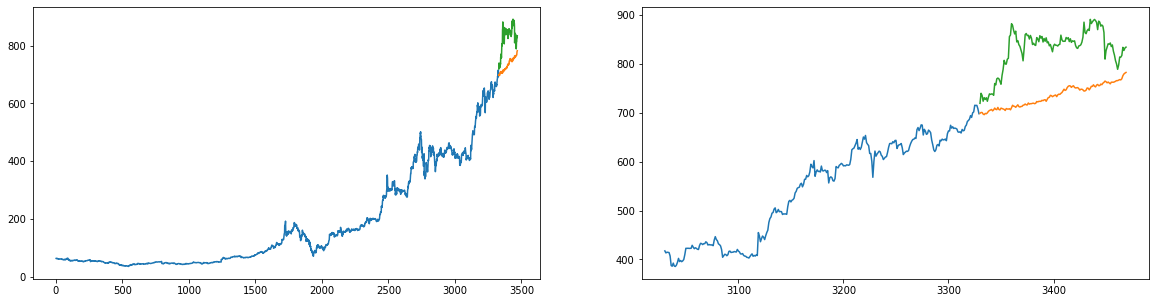

In [60]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:-35*4]
x_test = features[cut_idx:-35*4]
y_test = lm.predict(x_test)
print('y_test : ',np.shape(y_test))
print('x_test.index : ',np.shape(x_test.index))
print('y_test_true : ',np.shape(y_test_true))

y_train_os = np.exp((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0]))
offset = ((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0])).iloc[-1,0]
print(np.exp(offset))
y_test_os = np.exp((y_test/100).cumsum(1)+offset)
y_test_true_os = np.exp((y_test_true/100).cumsum(1)+offset)

print('y_test_os : ',np.shape(y_test_os))
print('x_test.index : ',np.shape(x_test.index))
print('y_test_true_os : ',np.shape(y_test_true_os))

axs[0].plot(y_train_os['O@t'])
#axs[0].plot(x_test.index,y_test[:,0])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

axs[1].plot(y_train_os['O@t'][-300:])
#axs[1].plot(x_test.index,y_test[:,0])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

In [64]:
knn_v3 = KNN().fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])

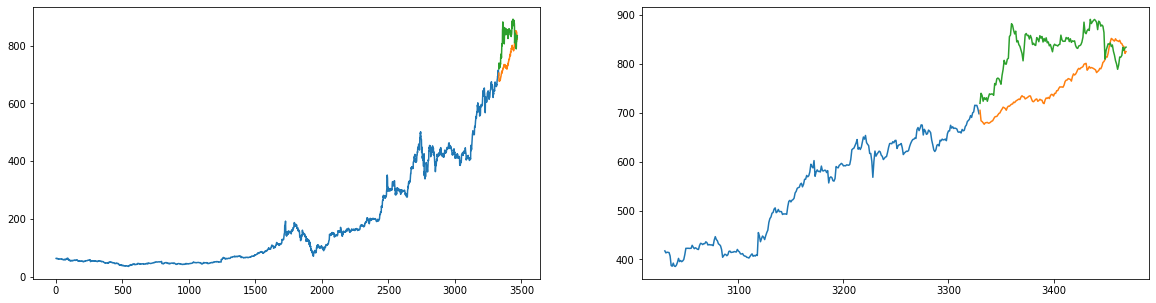

In [65]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:-35*4]
x_test = features[cut_idx:-35*4]
y_test = knn_v3.predict(x_test)

y_train_os = np.exp((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0]))
offset = ((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0])).iloc[-1,0]
y_test_os = np.exp((y_test/100).cumsum(1)+offset)
y_test_true_os = np.exp((y_test_true/100).cumsum(1)+offset)


axs[0].plot(y_train_os['O@t'])
#axs[0].plot(x_test.index,y_test[:,0])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

axs[1].plot(y_train_os['O@t'][-300:])
#axs[1].plot(x_test.index,y_test[:,0])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

In [86]:
radnn_v2 = radNN(radius=17)
radnn_v2.fit(x_train,y_train)

RadiusNeighborsRegressor(radius=17)

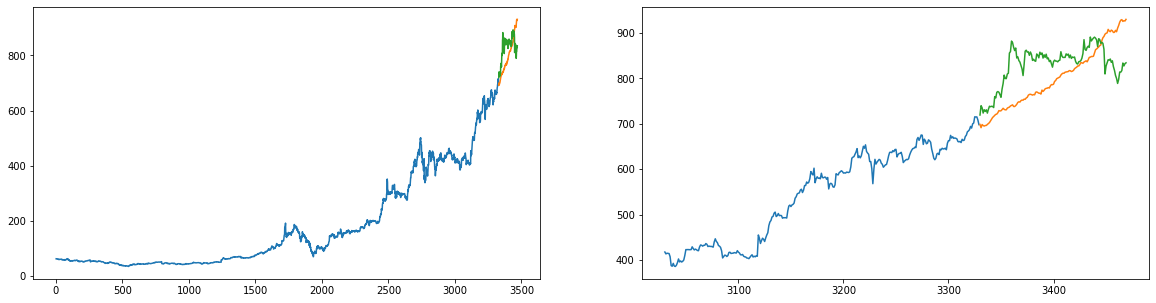

In [87]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:-35*4]
x_test = features[cut_idx:-35*4]
y_test = radnn_v2.predict(x_test)

y_train_os = np.exp((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0]))
offset = ((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0])).iloc[-1,0]
y_test_os = np.exp((y_test/100).cumsum(1)+offset)
y_test_true_os = np.exp((y_test_true/100).cumsum(1)+offset)


axs[0].plot(y_train_os['O@t'])
#axs[0].plot(x_test.index,y_test[:,0])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

axs[1].plot(y_train_os['O@t'][-300:])
#axs[1].plot(x_test.index,y_test[:,0])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

# Decison tree regression

In [13]:
from sklearn import tree

In [14]:
dectree = tree.DecisionTreeRegressor()
dectree.fit(x_train,y_train)

DecisionTreeRegressor()

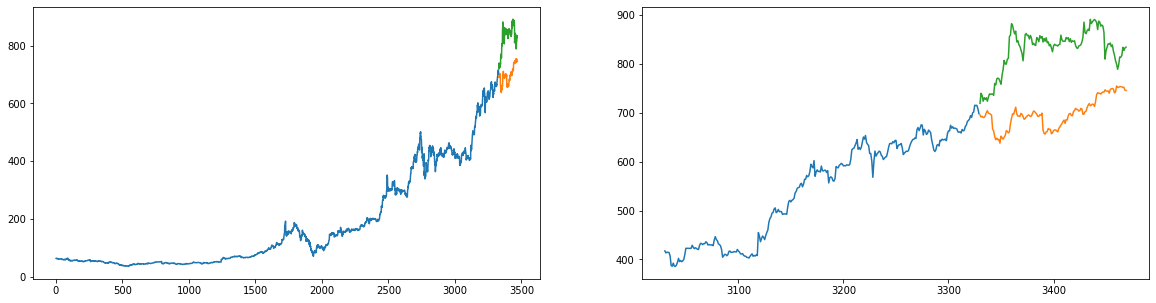

In [15]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:-35*4]
x_test = features[cut_idx:-35*4]
y_test = dectree.predict(x_test)

y_train_os = np.exp((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0]))
offset = ((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0])).iloc[-1,0]
y_test_os = np.exp((y_test/100).cumsum(1)+offset)
y_test_true_os = np.exp((y_test_true/100).cumsum(1)+offset)


axs[0].plot(y_train_os['O@t'])
#axs[0].plot(x_test.index,y_test[:,0])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

axs[1].plot(y_train_os['O@t'][-300:])
#axs[1].plot(x_test.index,y_test[:,0])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

In [54]:
tsla_trend = pickle.load(open("../data/GT_tsla_h.pickle","rb"))
print(tsla_trend)

                      tsla
2018-12-30 00:00:00   0.77
2018-12-30 01:00:00   0.88
2018-12-30 02:00:00   0.77
2018-12-30 03:00:00   0.77
2018-12-30 04:00:00   0.88
...                    ...
2021-03-05 20:00:00  38.76
2021-03-05 21:00:00  36.21
2021-03-05 22:00:00   30.6
2021-03-05 23:00:00  28.05
2021-03-06 00:00:00  24.48

[19239 rows x 1 columns]


In [55]:
response = pd.DataFrame({'O@t':returns})
#response.columns(['O@t'])
features = pd.DataFrame()
for i in range(1,35*4):
    response['O@t+'+str(i)] = response['O@t'].shift(-i)
    features['O@t-'+str(i)] = response['O@t'].shift(i)
    
#print('Response matrix : ',response)
#print('Feature matrix : ',features)
#print(tsla)
start_dt = '2019-02-11T10'
end_dt = '2021-02-10T15'
features['tsla trend'] = (tsla_trend[start_dt:end_dt]).reset_index()['tsla']

y_train = response[35*4:cut_idx] #gotta remove the line with NaN's
x_train = features[35*4:cut_idx]
#print('x_train : ',x_train)
#print('y_train : ',y_train)


In [56]:
dectree_v2 = tree.DecisionTreeRegressor().fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])
knn_v4 = KNN().fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])
lm = LinearRegression().fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])

y_test :  (48, 140)
x_test.index :  (48,)
y_test_true :  (48, 140)
698.203186035156
y_test_os :  (48, 140)
x_test.index :  (48,)
y_test_true_os :  (48, 140)


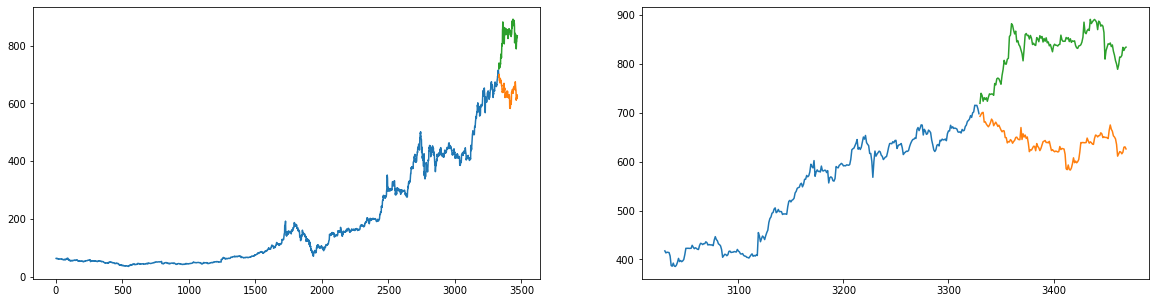

In [60]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:-35*4]
x_test = features[cut_idx:-35*4]
y_test = dectree_v2.predict(x_test)
print('y_test : ',np.shape(y_test))
print('x_test.index : ',np.shape(x_test.index))
print('y_test_true : ',np.shape(y_test_true))

y_train_os = np.exp((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0]))
offset = ((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0])).iloc[-1,0]
print(np.exp(offset))
y_test_os = np.exp((y_test/100).cumsum(1)+offset)
y_test_true_os = np.exp((y_test_true/100).cumsum(1)+offset)

print('y_test_os : ',np.shape(y_test_os))
print('x_test.index : ',np.shape(x_test.index))
print('y_test_true_os : ',np.shape(y_test_true_os))

axs[0].plot(y_train_os['O@t'])
#axs[0].plot(x_test.index,y_test[:,0])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

axs[1].plot(y_train_os['O@t'][-300:])
#axs[1].plot(x_test.index,y_test[:,0])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

In [44]:
musk_trend = pickle.load(open("../data/GT_musk_h.pickle","rb"))
print(musk_trend)

                      musk
2018-12-30 00:00:00   5.12
2018-12-30 01:00:00    4.8
2018-12-30 02:00:00   4.96
2018-12-30 03:00:00    5.2
2018-12-30 04:00:00    4.8
...                    ...
2021-03-05 20:00:00  16.72
2021-03-05 21:00:00  17.38
2021-03-05 22:00:00  18.26
2021-03-05 23:00:00  15.84
2021-03-06 00:00:00  12.76

[19239 rows x 1 columns]


In [51]:
response = pd.DataFrame({'O@t':returns})
#response.columns(['O@t'])
features = pd.DataFrame()
for i in range(1,35*4):
    response['O@t+'+str(i)] = response['O@t'].shift(-i)
    features['O@t-'+str(i)] = response['O@t'].shift(i)
    
#print('Response matrix : ',response)
#print('Feature matrix : ',features)
#print(tsla)
start_dt = '2019-02-11T10'
end_dt = '2021-02-10T15'
features['musk trend'] = (musk_trend[start_dt:end_dt]).reset_index()['musk']

y_train = response[35*4:cut_idx] #gotta remove the line with NaN's
x_train = features[35*4:cut_idx]
#print('x_train : ',x_train)
#print('y_train : ',y_train)

In [52]:
dectree_v2 = tree.DecisionTreeRegressor().fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])
#knn_v4 = KNN().fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])
#lm = LinearRegression().fit(x_train.iloc[:-35*4], y_train.iloc[:-35*4])

y_test :  (48, 140)
x_test.index :  (48,)
y_test_true :  (48, 140)
698.203186035156
y_test_os :  (48, 140)
x_test.index :  (48,)
y_test_true_os :  (48, 140)


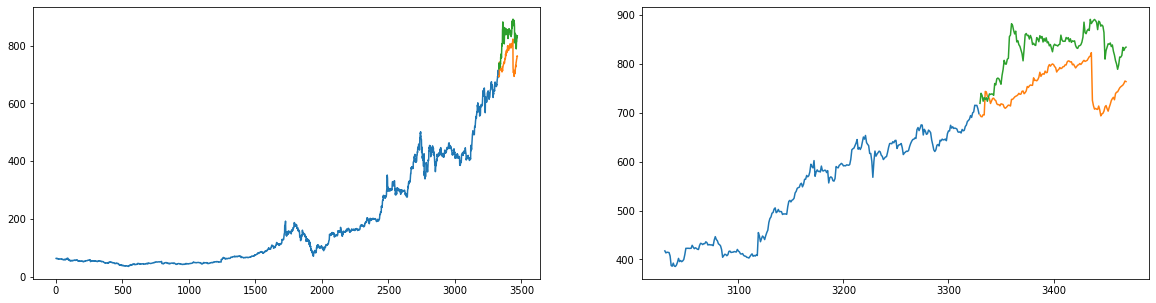

In [53]:
fig, axs =plt.subplots(1,2,figsize=(20,5))

y_test_true = response[cut_idx:-35*4]
x_test = features[cut_idx:-35*4]
y_test = dectree_v2.predict(x_test)
print('y_test : ',np.shape(y_test))
print('x_test.index : ',np.shape(x_test.index))
print('y_test_true : ',np.shape(y_test_true))

y_train_os = np.exp((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0]))
offset = ((response[:cut_idx]/100).cumsum()+np.log(tsla['Open'].iloc[0])).iloc[-1,0]
print(np.exp(offset))
y_test_os = np.exp((y_test/100).cumsum(1)+offset)
y_test_true_os = np.exp((y_test_true/100).cumsum(1)+offset)

print('y_test_os : ',np.shape(y_test_os))
print('x_test.index : ',np.shape(x_test.index))
print('y_test_true_os : ',np.shape(y_test_true_os))

axs[0].plot(y_train_os['O@t'])
#axs[0].plot(x_test.index,y_test[:,0])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[0].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])

axs[1].plot(y_train_os['O@t'][-300:])
#axs[1].plot(x_test.index,y_test[:,0])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_os[0,:])
axs[1].plot(range(x_test.index[0],x_test.index[0]+140),y_test_true_os.iloc[0])